## Dispersion: prism

This code is the same as 
<a href="https://opticsf2f.github.io/Opticsf2f_CodeBook/PrismRefraction.html">PrismRefraction.ipynb</a>
except that here we are going to use three colours.

We can set the refractive indices for each colour separately and hence explore **dispersion**.

<iframe src="DispInteractive.html" title="Interactive Prism Tutorial" height = 600> </iframe>


The images we create is iconic. Newton's in his so called *experimentum crucis* studied prism refraction of sunlight adding a second 
prism in the red path to show that you cannot split a primary colour. However, the claim Newton made was not actually 
true as the red light still has a range of wavelengths which diverge after a second prism.

The image is also iconic as a similar image was used as the album cover for Dark Side of the Moon by Pink Floyd in 1973.
A good exercise is to see if you think there is a problem with their back cover?



Next, we explore the code that generates the images in the interactive figure above.
    
The Jupyter Notebook is Disp.ipynb see

https://github.com/opticsf2f/Opticsf2f_CodeBook

<div class="interactive-start" onclick="initInteractiveCode()" title="This runs Python in your browser, allowing you local calculations">CLICK HERE TO ACTIVATE CODE CELLS</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import matplotlib.colors as colors
from numpy.fft import fft, ifft, fftshift

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams["text.latex.preamble"]  = r"\usepackage{amsmath} \usepackage{amssymb} \usepackage[bitstream-charter]{mathdesign}"
mpl.rcParams["text.usetex"] = True

This cell defines a few functions. We shall use Triangle for a prism and GBeam for our input light.

In [2]:
def GBeam(zb,yb,z0,y0,beamsize,angle):
    angle = angle
    za = (zb-z0)*np.cos(angle) + (yb-y0)*np.sin(angle)
    ya = (yb-y0)*np.cos(angle) - (zb-z0)*np.sin(angle)
    zR = np.pi*beamsize**2
    q = za-1.j*zR
    return (-1.j*zR*np.exp(2*np.pi*1.j*(za+ya*ya/(2*q)))/q) 

def Triangle(x,y,x0,y0,size,angle):
    return ((-y-y0 + size/(2*np.cos(angle/2))-np.tan(angle)*(x-x0) > (0)) 
            &  (-y-y0 + size/(2*np.cos(angle/2))+np.tan(angle)*(x-x0) > (0)) 
            & (-y-y0 + size/(2*np.cos(angle/2)) < (size*np.cos(angle/2))))


Next we define a grid in units of the wavelength. $dy$ and $dz$ are the spatial resolution. 
$\lambda/50$ for the values given below.

In [3]:
zmin = 0 # z is the horizontal axis so like x in cartesian system
zmax = 160
ymin = -80   # vertical axis coould be x or y, call it y to agree with standard axes
ymax = 80
dz = 0.1
dy = 0.1
zoom = 1
Z, Y = np.mgrid[zmin/zoom:zmax/zoom:dz/zoom,ymin/zoom:ymax/zoom:dy/zoom]
z_pts, y_pts = np.shape(Z)

This is the $k$-space grid.

In [4]:
kymax=1.0*np.pi/dy 
dky=2*kymax/y_pts
ky=np.arange(-kymax,kymax,dky) # fourier axis scaling
ky2=ky*ky
ky2c=ky2.astype('complex') #Notes on complex types http://www.scipy.org/NegativeSquareRoot
k=2.0*np.pi # k=2pi/lambda with lambda_0=1
k2=k*k
kz=np.sqrt(k2-ky2c)

This is the propagation phase the appear in the hedgehog equation.

In [5]:
ph=1.0j*kz*dz

We define triangle that will become our prism

In [6]:
PSize = 60
PAngle = 60*np.pi/180
PCentre = PSize/(2*np.cos(PAngle/2))
PWidth = PSize*np.sin(PAngle/2)
Prism = Triangle(Z,Y,zmax/2,0,PSize,PAngle)

The next cell generates an image. Change Index and Disp to vary the three refractive indices.

--- 1.1082289218902588 seconds ---


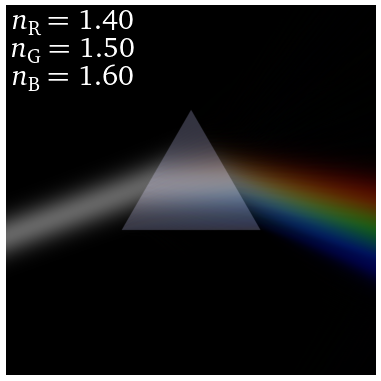

In [7]:
start_time = time.time()

Index = 1.5

R = np.zeros((z_pts,y_pts))
G = np.zeros((z_pts,y_pts))
B = np.zeros((z_pts,y_pts))

Disp = 0.1

NR = np.zeros((z_pts,y_pts))# refractive index
NR += (Index-Disp-1)*Prism # n-1 red 
NG = np.zeros((z_pts,y_pts))# refractive index
NG += (Index-1)*Prism # n-1 green 
NB = np.zeros((z_pts,y_pts))# refractive index
NB += (Index+Disp-1)*Prism # n-1 blue

BeamSize = 8
BAngle = 20*np.pi/180
BeamOffset = -20

E0 = GBeam(Z[0,:],Y[0,:],0,BeamOffset,BeamSize,BAngle)

b = fftshift(fft(E0))
for jj in range (0,z_pts): # propagat
        c = ifft(fftshift(b)) * np.exp(2.0j*np.pi*NR[jj,:]*dz)
        b = fftshift(fft(c)) * np.exp(1.0j*kz*dz)
        R[jj,:] +=  0.2*(abs(c)*abs(c))**0.5
b = fftshift(fft(E0))
for jj in range (0,z_pts): # propagat
        c = ifft(fftshift(b)) * np.exp(2.0j*np.pi*NG[jj,:]*dz)
        b = fftshift(fft(c)) * np.exp(1.0j*kz*dz)
        G[jj,:] +=  0.2*(abs(c)*abs(c))**0.5
b = fftshift(fft(E0))
for jj in range (0,z_pts): # propagat
        c = ifft(fftshift(b)) * np.exp(2.0j*np.pi*NB[jj,:]*dz)
        b = fftshift(fft(c)) * np.exp(1.0j*kz*dz)
        B[jj,:] +=  0.2*(abs(c)*abs(c))**0.5

fig, (ax1) = plt.subplots(1,1,figsize=(8, 8),dpi=60)


R+=0.2*(Index-1)*Prism # add prism to final image
G+=0.2*(Index-1)*Prism
B+=0.25*(Index-1)*Prism

br=2.0 
bg=2.0 
bb=2.0 

R=np.clip(br*R,0.0,1.0)
G=np.clip(bg*G,0.0,1.0)
B=np.clip(bb*B,0.0,1.0)
RGB=np.dstack((np.flipud(R.T), np.flipud(G.T), np.flipud(B.T))) # use transpose to swap image axes, flipud to origin at bottom left

ax1.imshow(RGB)

ax1.text(25,100,r'$n_{\rm R} =$ %.2f' %(Index-Disp),color='white',fontsize = 36)
ax1.text(20,220,r'$n_{\rm G} =$ %.2f' %(Index),color='white',fontsize = 36)
ax1.text(25,340,r'$n_{\rm B} =$ %.2f' %(Index+Disp),color='white',fontsize = 36)


print("--- %s seconds ---" % (time.time() - start_time))

ax1.set_axis_off()
